In [330]:
import cv2
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import MNIST
from torchvision import transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [331]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

In [332]:
train_data = MNIST(
    root = '/content/',
    train = True,
    transform = transform,
    download = True
)

In [333]:
batch_size = 64
train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = True)

In [334]:
img, lab = next(iter(train_loader))

In [335]:
print('min = ', torch.min(img[0]).item())
print('max = ', torch.max(img[0]).item())

min =  -1.0
max =  0.9921568632125854


## Neural Network

In [336]:
class NNModel(nn.Module):
  def __init__(self):
    super(NNModel, self).__init__()
    self.encoder = nn.Sequential(

        nn.Linear(28*28, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),

        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),

        nn.Linear(256, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),

        nn.Linear(64, 8),
    )
    self.decoder = nn.Sequential(
        nn.Linear(8, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Linear(64, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Linear(256, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 28*28),
        nn.Tanh()
    )
  def forward(self, X):
    encode = self.encoder(X)
    decode = self.decoder(encode)
    return decode

In [337]:
model = NNModel()
model.to(device)

NNModel(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=8, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features

In [ ]:
epoches = 5
lr = 0.01
last_ele_idx = len(train_data)//batch_size

criterian = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr)

## Training

In [339]:
def plot(img, epoche = None):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.imshow(img.cpu().permute(1, 2, 0), cmap = 'grey')
  ax1.set_title("Original")

  model.eval()
  with torch.no_grad():
    pred = model(img.reshape(1, -1)).reshape(28, 28, 1).detach().cpu()

  ax2.imshow(pred, cmap = 'grey')
  ax2.set_title("Compressed")

  if epoche:
    plt.suptitle(f"Epoche = {epoche}", y = 0.9)
  plt.show()


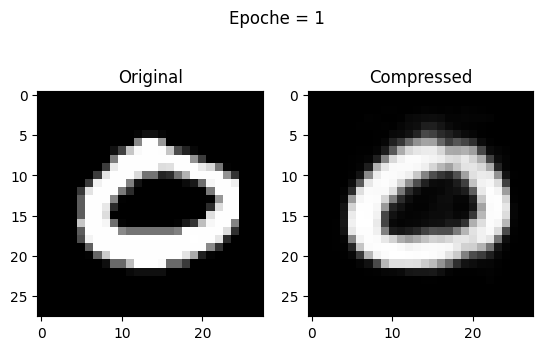


For epoche 1 average loss = 0.09372336239512287



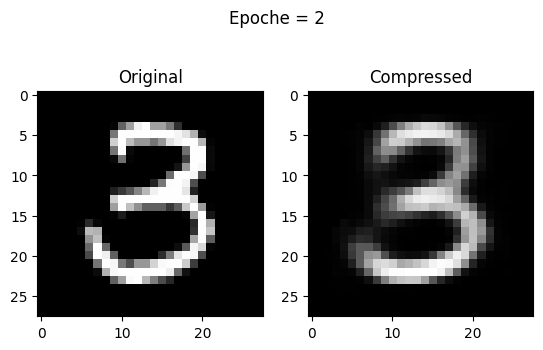


For epoche 2 average loss = 0.10017490923118744



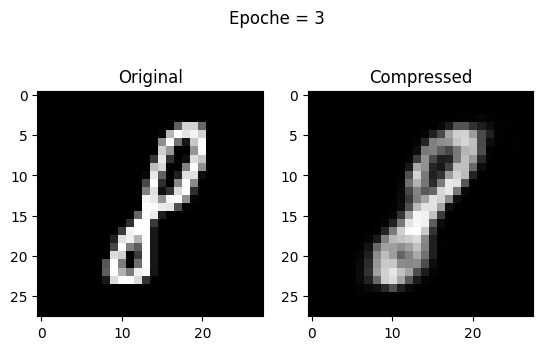


For epoche 3 average loss = 0.078248383922141



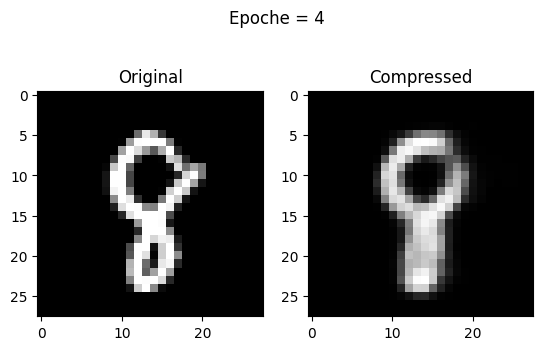


For epoche 4 average loss = 0.07246373785234718



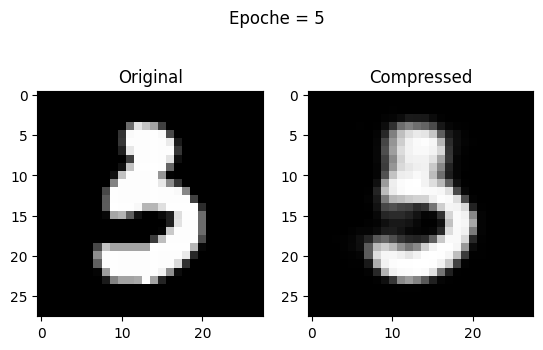


For epoche 5 average loss = 0.06938758448385862



In [341]:
for epoche in range(epoches):
  totalloss = 0
  cnt = 0
  for img, _ in train_loader:
    img = img.to(device)
    y = model(img.reshape(-1, 28*28))
    loss = criterian(y, img.reshape(-1, 28*28))
    totalloss+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    cnt+=1
    if(cnt == last_ele_idx):
      plot(img[0], epoche+1)
  print(f"\nFor epoche {epoche+1} average loss = {totalloss/len(train_loader)}", end = "\n\n")

## Prediction

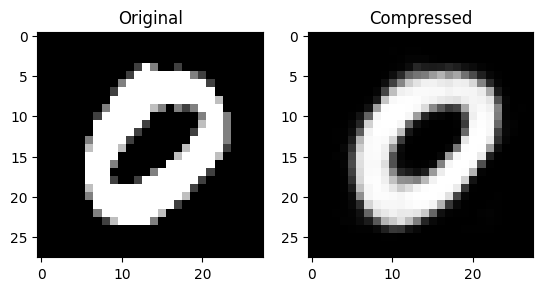

In [342]:
plot(img[0].to(device))

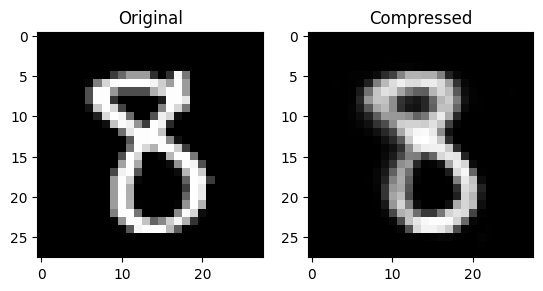

In [343]:
plot(img[1].to(device))